### Pytorch Quiz
- CNN을 활용한 모델을 만들어서 정확도 95% 이상의 Classifier를 만드세요
- 코드 수정 가능

In [3]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
from torch import optim
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms

#### Dataset download

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = transform, 
    download = True,            
)
dataloader_train = DataLoader(train_data, 
                              batch_size=16, 
                              shuffle=True)

test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = transform
)
dataloader_test = DataLoader(test_data, 
                              batch_size=16, 
                              shuffle=True)

#### Check images

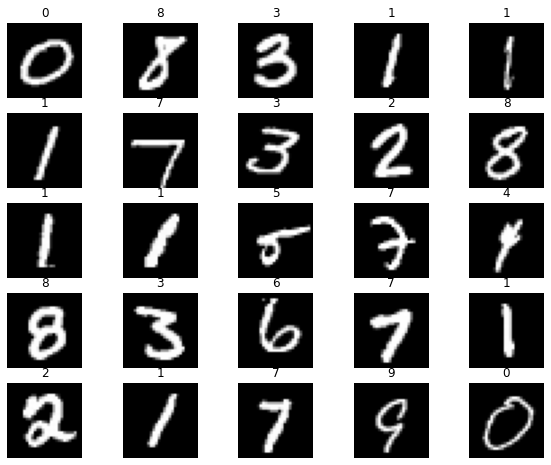

In [5]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

#### CNN
##### structure
- Convolution 1 : channels 16, kernel size 5, stride 1, padding 2 (output resolution?)
- ReLU
- MaxPool : kernel_size 2, stride 2
- Convlution 2 : channels 32, kernel size 5, stride 1, padding 2 (output resolution?)
- Linear : output channels 10 

##### https://pytorch.org/docs/1.12/nn.html

In [27]:
class CNN(nn.Module):
    def __init__(self):
        ## TODO ##
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1,
                               out_channels=16,
                               kernel_size=5,
                               stride=1,
                               padding=2)
        self.conv2 = nn.Conv2d(in_channels=16,
                               out_channels=32,
                               kernel_size=5,
                               stride=1,
                               padding=2)
        self.out = nn.Linear(6272, 10)
    
    def forward(self, x):
        ## TODO ##
        print(x.shape)
        x = self.conv1(x)
        print(x.shape)
        x = nn.ReLU()(x)
        x = nn.MaxPool2d(2, 2)(x)
        print(x.shape)
        x = self.conv2(x)
        print(x.shape)
        x = x.view(x.shape[0],-1)
        print(x.shape)
        
        x = self.out(x)
        print(x.shape)
        return x
    
x = torch.randn(16, 1, 28, 28)
cnn = CNN()
res = cnn(x)

torch.Size([16, 1, 28, 28])
torch.Size([16, 16, 28, 28])
torch.Size([16, 16, 14, 14])
torch.Size([16, 32, 14, 14])
torch.Size([16, 6272])
torch.Size([16, 10])


#### Train

In [22]:
cnn = CNN()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)

In [23]:
# Train the model
num_epochs = 5

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(dataloader_train):
        output = cnn(images)
        loss = loss_func(output, labels)

        # clear gradients for this training step
        optimizer.zero_grad()

        # backpropagation, compute gradients
        loss.backward()
        # apply gradients
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}], Loss: {:.4f}' 
                   .format(epoch + 1, num_epochs, i + 1, loss.item()))

Epoch [1/5], Step [100], Loss: 1.4812
Epoch [1/5], Step [200], Loss: 0.2682
Epoch [1/5], Step [300], Loss: 0.4013
Epoch [1/5], Step [400], Loss: 0.1402
Epoch [1/5], Step [500], Loss: 0.0086
Epoch [1/5], Step [600], Loss: 0.1367
Epoch [1/5], Step [700], Loss: 0.4189
Epoch [1/5], Step [800], Loss: 0.0183
Epoch [1/5], Step [900], Loss: 0.0324
Epoch [1/5], Step [1000], Loss: 0.0471
Epoch [1/5], Step [1100], Loss: 0.0487
Epoch [1/5], Step [1200], Loss: 0.0355
Epoch [1/5], Step [1300], Loss: 0.3669
Epoch [1/5], Step [1400], Loss: 0.0166
Epoch [1/5], Step [1500], Loss: 0.0066
Epoch [1/5], Step [1600], Loss: 0.0434
Epoch [1/5], Step [1700], Loss: 0.2403
Epoch [1/5], Step [1800], Loss: 0.7831
Epoch [1/5], Step [1900], Loss: 0.9210
Epoch [1/5], Step [2000], Loss: 0.8574
Epoch [1/5], Step [2100], Loss: 0.3512
Epoch [1/5], Step [2200], Loss: 0.9005
Epoch [1/5], Step [2300], Loss: 0.0306
Epoch [1/5], Step [2400], Loss: 0.5770
Epoch [1/5], Step [2500], Loss: 0.9340
Epoch [1/5], Step [2600], Loss: 0.

#### Test

In [25]:
cnn.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in dataloader_test:
        test_output = cnn(images) # last_layer
        pred_y = torch.max(test_output, 1)[1].data.squeeze()
        correct += (pred_y == labels).sum().item()
        total += labels.size(0)
    accuracy = correct / total * 100
    
print('Test Accuracy of the model on the 10000 test images: %.2f Percent' % accuracy)

Test Accuracy of the model on the 10000 test images: 92.49 Percent
